# Visualization Notebook: Pre-processing

In [4]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
import plotly.graph_objects as go
from astropy.io import fits
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [8]:
data=pd.read_csv('data.csv',sep=';')

In [10]:
data=data.rename(columns={'Data':'Day','Godzina':'hour','Minuty':'minutes','Wolumen':'Load'})

In [11]:
#Building a continous time array
data['seconds']=np.arange(0,len(data)*900,900)

Text(0.5, 1.0, 'Load vs Time scatterplot')

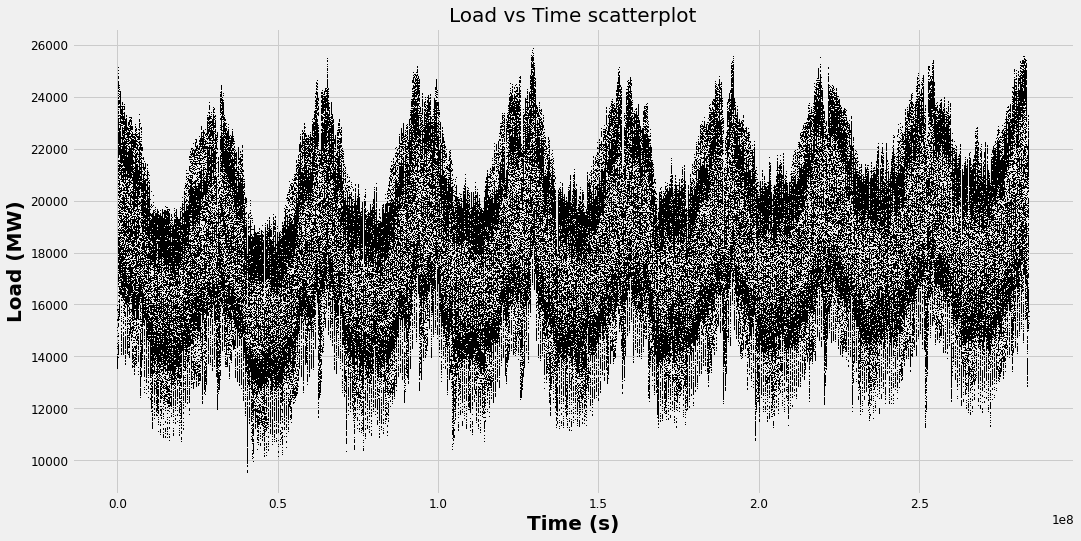

In [15]:
plt.plot(data.seconds,data.Load,',',color='k')
plt.grid(True)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Load (MW)',fontsize=20)
plt.title('Load vs Time scatterplot',fontsize=20)

In [16]:
from scipy import signal

In [17]:
#Detrend the signal of its constant and linear trend

In [18]:
detrended_sig=signal.detrend(data.Load)

Text(0, 0.5, 'Load (MW)')

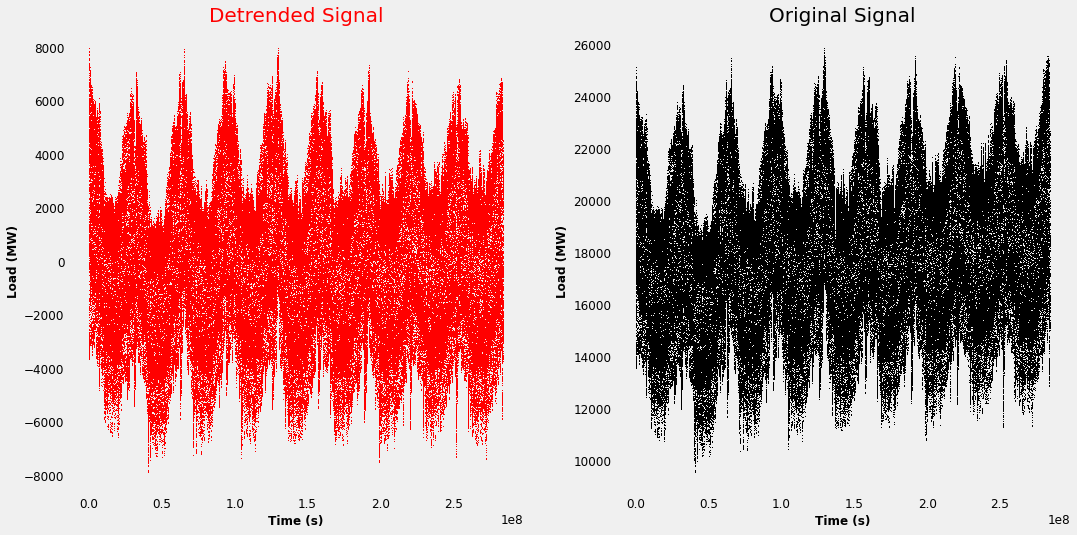

In [29]:
plt.subplot(1,2,1)
plt.title('Detrended Signal',color='red',fontsize=20)
plt.plot(data.seconds,detrended_sig,',',color='red',label='Detrended')
plt.xlabel('Time (s)')
plt.ylabel('Load (MW)')
plt.subplot(1,2,2)
plt.title('Original Signal',color='k',fontsize=20)
plt.plot(data.seconds,data.Load,',',color='black',label='Original')
plt.xlabel('Time (s)')
plt.ylabel('Load (MW)')

Text(0, 0.5, 'Load(MW)')

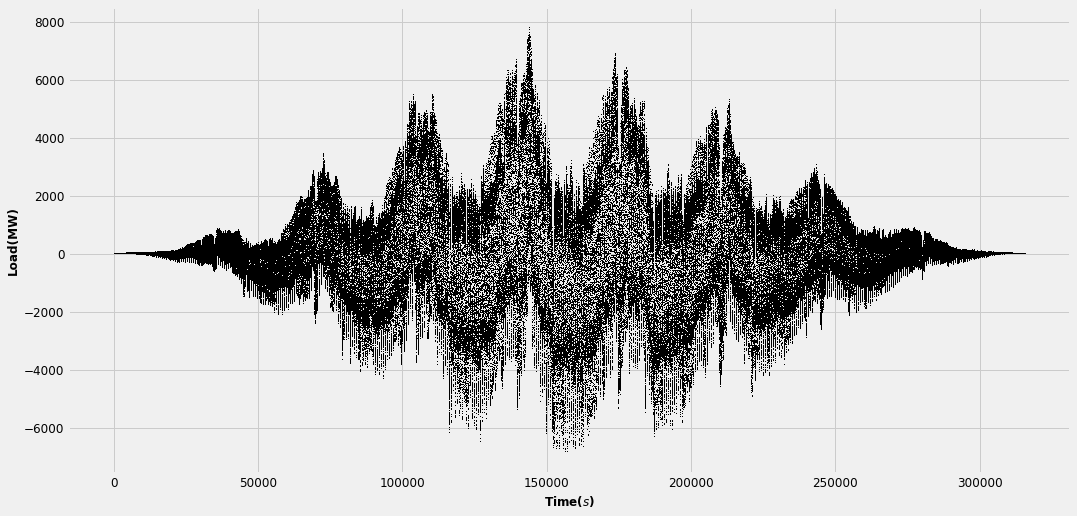

In [32]:
#Multiplying the signal by an hanning window

plt.plot(detrended_sig*np.hanning(len(data)),',',color='k')
plt.grid(True)
plt.xlabel('Time($s$)')
plt.ylabel('Load(MW)')